<a href="https://colab.research.google.com/github/DavideBrioschi/PortfolioProjects/blob/main/BTC_NeuralProphet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install

In [2]:
# pip install yfinance
!pip install NeuralProphet


In [3]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
!pip install git+https://github.com/ourownstory/neural_prophet.git numpy==1.23.5 #this resolve issue in Colab

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-x_yweoar
  Running command git clone --filter=blob:none --quiet https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-x_yweoar
  Resolved https://github.com/ourownstory/neural_prophet.git to commit 7aac3beb54179389cb60e08263a0f309cabda917
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
#Read and Preprocess the Data

In [5]:
#stock_symbol = 'tsla' #Tesla
stock_symbol = 'btc-usd' #Bitcoin
start_date = '2020-10-01' #max history
end_date = '2023-11-19'

stock_data = yf.download(stock_symbol, start = start_date, end = end_date)
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2020-10-01  10795.254883  10933.624023  10472.356445  10619.452148   
2020-10-02  10619.821289  10657.837891  10416.689453  10575.974609   
2020-10-03  10575.100586  10598.940430  10511.129883  10549.329102   
2020-10-04  10550.440430  10686.000000  10534.391602  10669.583008   
2020-10-05  10676.529297  10793.507812  10634.600586  10793.339844   

               Adj Close       Volume  
Date                                   
2020-10-01  10619.452148  40023134100  
2020-10-02  10575.974609  48661453918  
2020-10-03  10549.329102  44660271563  
2020-10-04  10669.583008  71251776995  
2020-10-05  10793.339844  47537578009  


In [6]:
stock_data.to_csv('btc_data.csv')

In [7]:
stocks = pd.read_csv('btc_data.csv')
stocks.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date']) # Convert object in Date
stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
stocks = stocks[['Date','Close']]
stocks

,Date,Close
0,2020-10-01,10619.452148
1,2020-10-02,10575.974609
2,2020-10-03,10549.329102
3,2020-10-04,10669.583008
4,2020-10-05,10793.339844
...,...,...
1139,2023-11-14,35537.640625
1140,2023-11-15,37880.582031
1141,2023-11-16,36154.769531
1142,2023-11-17,36596.683594


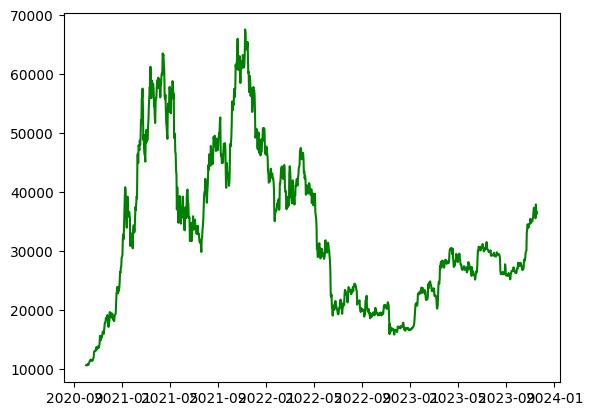

In [10]:
stocks.columns = ['ds','y']

plt.plot(stocks['ds'], stocks['y'], label = 'actual', c = 'g')
plt.show()

In [11]:
# this is not financial advise - is only how machine learning model is performing on a given data set

In [12]:
#TRAIN THE MODEL
model = NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.913% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.913% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 64
INFO - (NP.co

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,41691.117188,51050.226562,0.539496,0.0,0
1,36301.273438,44454.136719,0.457421,0.0,1
2,31340.964844,38223.734375,0.380807,0.0,2
3,26653.800781,32340.789062,0.309352,0.0,3
4,22312.218750,27144.912109,0.243274,0.0,4
...,...,...,...,...,...
181,2500.744629,3213.404541,0.005163,0.0,181
182,2504.432373,3210.345459,0.005195,0.0,182
183,2496.039551,3215.313477,0.005165,0.0,183
184,2504.233154,3217.299561,0.005175,0.0,184


In [14]:
#Evaluate the Model (prediction)
future = model.make_future_dataframe(stocks, periods = 300) #300 days from now

forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.913% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.913% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 18it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [15]:
forecast['ds'], forecast['yhat1']

(0     2023-11-19
 1     2023-11-20
 2     2023-11-21
 3     2023-11-22
 4     2023-11-23
          ...    
 295   2024-09-09
 296   2024-09-10
 297   2024-09-11
 298   2024-09-12
 299   2024-09-13
 Name: ds, Length: 300, dtype: datetime64[ns],
 0      33706.281250
 1      33572.355469
 2      33524.777344
 3      33457.414062
 4      33223.171875
            ...     
 295    46961.093750
 296    46935.406250
 297    46895.968750
 298    46696.332031
 299    46627.113281
 Name: yhat1, Length: 300, dtype: float32)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.913% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.913% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.913% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.913% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 18it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


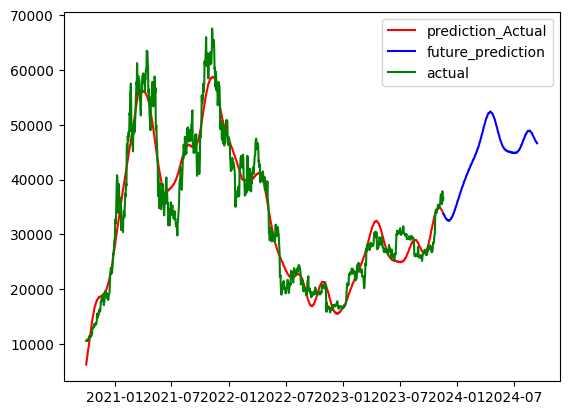

In [18]:
actual_prediction = model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label = 'prediction_Actual', c = 'r')
plt.plot(forecast['ds'], forecast['yhat1'], label = 'future_prediction', c= 'b')
plt.plot(stocks['ds'], stocks['y'], label = 'actual', c= 'g')
plt.legend()
plt.show()

In [19]:
model.plot_components(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
